## Índice

## Importación de Librerías

In [1]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

## Carga de datos

In [2]:
df = pd.read_csv(r"C:\Users\apico\OneDrive\Escritorio\MACHINE LEARNING\train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df = df.drop_duplicates(subset='Customer_ID', keep='first')

In [5]:
df = df.drop(['ID', 'Name', 'SSN', 'Customer_ID' ], axis =1)

In [6]:
df.T

,0,8,16,24,32,40,48,56,64,72,...,99920,99928,99936,99944,99952,99960,99968,99976,99984,99992
Month,January,January,January,January,January,January,January,January,January,January,...,January,January,January,January,January,January,January,January,January,January
Age,23,28_,34,54,21,31,33,7580,23,44,...,37,38,47,33,20,18,44,49,28,24
Occupation,Scientist,_______,_______,Entrepreneur,Developer,Lawyer,Lawyer,Media_Manager,Doctor,Journalist,...,_______,Manager,Developer,Media_Manager,Architect,Lawyer,Media_Manager,Writer,Architect,Mechanic
Annual_Income,19114.12,34847.84,143162.64,30689.89,35547.71_,73928.46,131313.4,34081.38_,114838.41,31370.8,...,139664.96,15319.65,22620.79,59146.36,38321.39,42903.79,16680.35,37188.1,20002.88,39628.99
Monthly_Inhand_Salary,1824.843333,3037.986667,12187.22,2612.490833,2853.309167,NaN,11242.783333,NaN,9843.8675,2825.233333,...,11777.746667,NaN,1722.065833,NaN,3354.449167,3468.315833,1528.029167,3097.008333,1929.906667,3359.415833
Num_Bank_Accounts,3,2,1,2,7,4,0,8,2,0,...,3,6,7,2,4,0,1,1,10,4
Num_Credit_Card,4,4,5,5,5,1288,1,7,5,5,...,6,7,3,5,4,4,1,4,8,6
Interest_Rate,3,6,8,4,5,8,8,15,7,12,...,12,15,9,6,3,6,5,5,29,7
Num_of_Loan,4,1,3,1,0,0,2,3,-100,2,...,4,4,0,1,4,1,4,3,5_,2
Type_of_Loan,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Credit-Builder Loan,"Auto Loan, Auto Loan, and Not Specified",Not Specified,NaN,NaN,"Credit-Builder Loan, and Mortgage Loan","Not Specified, Auto Loan, and Student Loan","Personal Loan, Debt Consolidation Loan, and Au...","Not Specified, and Payday Loan",...,"Credit-Builder Loan, Credit-Builder Loan, Stud...","Home Equity Loan, Auto Loan, Auto Loan, and Au...",NaN,Personal Loan,"Student Loan, Debt Consolidation Loan, Student...",Not Specified,"Payday Loan, Student Loan, Mortgage Loan, and ...","Home Equity Loan, Mortgage Loan, and Student Loan","Personal Loan, Auto Loan, Mortgage Loan, Stude...","Auto Loan, and Student Loan"


In [7]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Entrepreneur', 'Developer', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Teacher', 'Engineer',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [8]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8',
       'Low_spent_Large_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [9]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

## Limpieza de los datos

In [10]:
valor = '_______'
df = df.drop(df[df['Occupation'] == valor].index)
df['Occupation'].unique()

array(['Scientist', 'Entrepreneur', 'Developer', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Teacher', 'Engineer',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [11]:
valor = '!@9#%8'
df = df.drop(df[df['Payment_Behaviour'] == valor].index)
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [12]:
# Identificamos columnas a modificar el tipo de dato

columnas_a_modificar = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
            'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

# Quitamos el el '_' existente en gran parte de las columnas

def mof_numeros(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

for col in columnas_a_modificar:
    df[col] = df[col].apply(mof_numeros)

df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,Not Specified,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
40,January,31.0,Lawyer,73928.46,NaN,4,1288,8,0.0,NaN,...,Good,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
48,January,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
56,January,7580.0,Media_Manager,34081.38,NaN,8,7,15,3.0,"Not Specified, Auto Loan, and Student Loan",...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor


In [13]:
# Reemplazar NaN en 'Monthly_Inhand_Salary' con el salario anual dividido por 12 y aplicando un impuesto del 21.7%

df['Monthly_Inhand_Salary'].fillna(df['Annual_Income'] / 12 * (1 - 0.217), inplace=True)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,Not Specified,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
40,January,31.0,Lawyer,73928.46,4823.832015,4,1288,8,0.0,NaN,...,Good,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
48,January,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
56,January,7580.0,Media_Manager,34081.38,2223.810045,8,7,15,3.0,"Not Specified, Auto Loan, and Student Loan",...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor


In [14]:
# Elimanos registros con edades mayores de 100.
df = df.loc[(df['Age'] >= 0) & (df['Age'] <= 100)]
df['Age'].unique()

array([23., 54., 31., 33., 44., 40., 32., 35., 39., 36., 30., 45., 26.,
       41., 19., 34., 48., 37., 43., 21., 18., 42., 15., 27., 38., 25.,
       14., 22., 20., 16., 17., 24., 47., 28., 55., 29., 46., 49., 51.,
       50., 53., 52., 95.])

In [15]:
# Elimanos registros con personas que tienen más de 10 tarjetas.
df = df.loc[(df['Num_Credit_Card'] >= 0) & (df['Num_Credit_Card'] <= 10)]
df['Num_Credit_Card'].unique()

array([ 4,  5,  1,  6,  7,  8,  3,  2, 10,  9], dtype=int64)

In [16]:
# Sustituimos el registro 'NM' por 'No'.
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [17]:
# Extraemos el número de años y la columna 'Age'

def History_age(age):
    try:
        years = int("".join(re.findall('[0-9]', ''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]', ''.join(age.split("and")[1]))))
        return (years * 12 + month)/12
    except:
        return np.nan

# Aplicamos funcion 'History_age' a la columna 'Credit_History_Age'

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).apply(History_age)

# Eliminar las filas con NaN en la columna 'Credit_History_Age'

df = df.dropna(subset=['Credit_History_Age'])

df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,Not Specified,...,Good,632.46,26.544229,17.250000,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,January,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",...,Good,352.16,32.200509,30.583333,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
64,January,23.0,Doctor,114838.41,9843.867500,2,5,7,-100.0,"Personal Loan, Debt Consolidation Loan, and Au...",...,Good,1377.74,33.664554,21.333333,No,226.892792,215.193516,High_spent_Small_value_payments,802.300442,Good
80,January,40.0,Teacher,33751.27,2948.605833,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,Standard,1328.93,37.089076,19.166667,No,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard


In [18]:

# Calcular el valor z-score de cada valor en "Interest_Rate"
z_scores = stats.zscore(df["Interest_Rate"])

# Definir un umbral para identificar los outliers (por ejemplo, 3 desviaciones estándar)
threshold = 3

# Filtrar los valores que están por debajo o por encima del umbral
outliers = df[np.abs(z_scores) > threshold]

# Eliminar los outliers del dataframe
df = df[np.abs(z_scores) <= threshold]


In [19]:
# Calcular los umbrales de "Interest_Rate" para cada categoría en "Credit_Mix"
interest_rate_thresholds = {}

for category in ["Good", "Standard", "Bad"]:
    avg_interest_rate = df.loc[df["Credit_Mix"] == category, "Interest_Rate"].mean()
    interest_rate_thresholds[category] = avg_interest_rate

# Reemplazar los valores "_" en "Credit_Mix" según los umbrales de "Interest_Rate"
for index, row in df.iterrows():
    if row["Credit_Mix"] == "_":
        interest_rate = row["Interest_Rate"]
        closest_category = min(interest_rate_thresholds, key=lambda x: abs(interest_rate_thresholds[x] - interest_rate))
        df.loc[index, "Credit_Mix"] = closest_category

In [20]:
# Comprobamos porcentaje de cada etiqueta
credit_mix_means2 = df.groupby("Credit_Mix")["Interest_Rate"].mean().to_dict()
print(credit_mix_means2)

{'Bad': 29.710944808231993, 'Good': 10.342220828105395, 'Standard': 18.39449779392681}


In [21]:
# Buscamos negativos
negativos = (df[columnas_a_modificar] < 0).any()
negativos

Age                        False
Annual_Income              False
Num_of_Loan                 True
Num_of_Delayed_Payment      True
Changed_Credit_Limit        True
Amount_invested_monthly    False
Outstanding_Debt           False
Monthly_Balance            False
dtype: bool

In [22]:
# Eliminamos valores negativos
df = df[df['Num_of_Loan'] >= 0]
df = df[df['Changed_Credit_Limit'] >= 0]
df = df[df['Num_of_Delayed_Payment'] >= 0]
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,Not Specified,...,Good,632.46,26.544229,17.250000,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,January,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",...,Good,352.16,32.200509,30.583333,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
80,January,40.0,Teacher,33751.27,2948.605833,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,Standard,1328.93,37.089076,19.166667,No,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard
88,January,32.0,Engineer,88640.24,7266.686667,3,6,1,2.0,"Payday Loan, and Payday Loan",...,Good,950.36,28.210617,25.416667,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard


In [23]:
# Eliminamos la columna de Type_of_Loan, tiene muchos NaN y para el modelo no nos sirve
df = df.drop('Type_of_Loan',axis=1)
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,0,...,Good,632.46,26.544229,17.250000,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,January,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,0,...,Good,352.16,32.200509,30.583333,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
80,January,40.0,Teacher,33751.27,2948.605833,5,5,20,3.0,16,...,Standard,1328.93,37.089076,19.166667,No,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard
88,January,32.0,Engineer,88640.24,7266.686667,3,6,1,2.0,-1,...,Good,950.36,28.210617,25.416667,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99936,January,47.0,Developer,22620.79,1722.065833,7,3,9,0.0,27,...,Standard,642.46,31.605703,29.250000,No,0.000000,56.072675,High_spent_Medium_value_payments,NaN,Standard
99952,January,20.0,Architect,38321.39,3354.449167,4,4,3,4.0,11,...,Good,678.57,35.123923,16.916667,No,114.271146,131.988993,High_spent_Small_value_payments,NaN,Poor
99960,January,18.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,14,...,Good,1079.48,27.289440,28.083333,No,50894.000000,78.514945,High_spent_Small_value_payments,NaN,Good
99976,January,49.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,...,Good,620.64,39.080823,29.750000,No,84.205949,223.875018,Low_spent_Small_value_payments,NaN,Good


In [24]:
pd.options.display.max_columns=0
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,0,6.0,1.99,4.0,Good,632.46,26.544229,17.250000,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,January,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,0,3.0,9.34,2.0,Good,352.16,32.200509,30.583333,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
80,January,40.0,Teacher,33751.27,2948.605833,5,5,20,3.0,16,20.0,11.00,4.0,Standard,1328.93,37.089076,19.166667,No,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard
88,January,32.0,Engineer,88640.24,7266.686667,3,6,1,2.0,-1,0.0,3.51,3.0,Good,950.36,28.210617,25.416667,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99936,January,47.0,Developer,22620.79,1722.065833,7,3,9,0.0,27,18.0,5.31,2.0,Standard,642.46,31.605703,29.250000,No,0.000000,56.072675,High_spent_Medium_value_payments,NaN,Standard
99952,January,20.0,Architect,38321.39,3354.449167,4,4,3,4.0,11,4.0,1.59,3.0,Good,678.57,35.123923,16.916667,No,114.271146,131.988993,High_spent_Small_value_payments,NaN,Poor
99960,January,18.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,14,0.0,4.10,1.0,Good,1079.48,27.289440,28.083333,No,50894.000000,78.514945,High_spent_Small_value_payments,NaN,Good
99976,January,49.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,12.0,5.38,3.0,Good,620.64,39.080823,29.750000,No,84.205949,223.875018,Low_spent_Small_value_payments,NaN,Good


In [25]:
# Sustituir los valores NaN por la media

mean = df['Amount_invested_monthly'].mean()

df['Amount_invested_monthly'].fillna(mean,inplace=True)

In [26]:
# Sustituir los valores NaN por la media

mean = df['Num_Credit_Inquiries'].mean()

df['Num_Credit_Inquiries'].fillna(mean,inplace=True)

In [27]:
# Sustituir los valores NaN por la media

mean = df['Monthly_Balance'].mean()

df['Monthly_Balance'].fillna(mean,inplace=True)

In [28]:
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [29]:
# Eliminamos la columna de Month, solo tiene un mes
df = df.drop('Month',axis=1)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,0,6.0,1.99,4.0,Good,632.46,26.544229,17.250000,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,0,3.0,9.34,2.0,Good,352.16,32.200509,30.583333,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
80,40.0,Teacher,33751.27,2948.605833,5,5,20,3.0,16,20.0,11.00,4.0,Standard,1328.93,37.089076,19.166667,No,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard
88,32.0,Engineer,88640.24,7266.686667,3,6,1,2.0,-1,0.0,3.51,3.0,Good,950.36,28.210617,25.416667,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99936,47.0,Developer,22620.79,1722.065833,7,3,9,0.0,27,18.0,5.31,2.0,Standard,642.46,31.605703,29.250000,No,0.000000,56.072675,High_spent_Medium_value_payments,405.290584,Standard
99952,20.0,Architect,38321.39,3354.449167,4,4,3,4.0,11,4.0,1.59,3.0,Good,678.57,35.123923,16.916667,No,114.271146,131.988993,High_spent_Small_value_payments,405.290584,Poor
99960,18.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,14,0.0,4.10,1.0,Good,1079.48,27.289440,28.083333,No,50894.000000,78.514945,High_spent_Small_value_payments,405.290584,Good
99976,49.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,12.0,5.38,3.0,Good,620.64,39.080823,29.750000,No,84.205949,223.875018,Low_spent_Small_value_payments,405.290584,Good


## Visualización de los datos

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

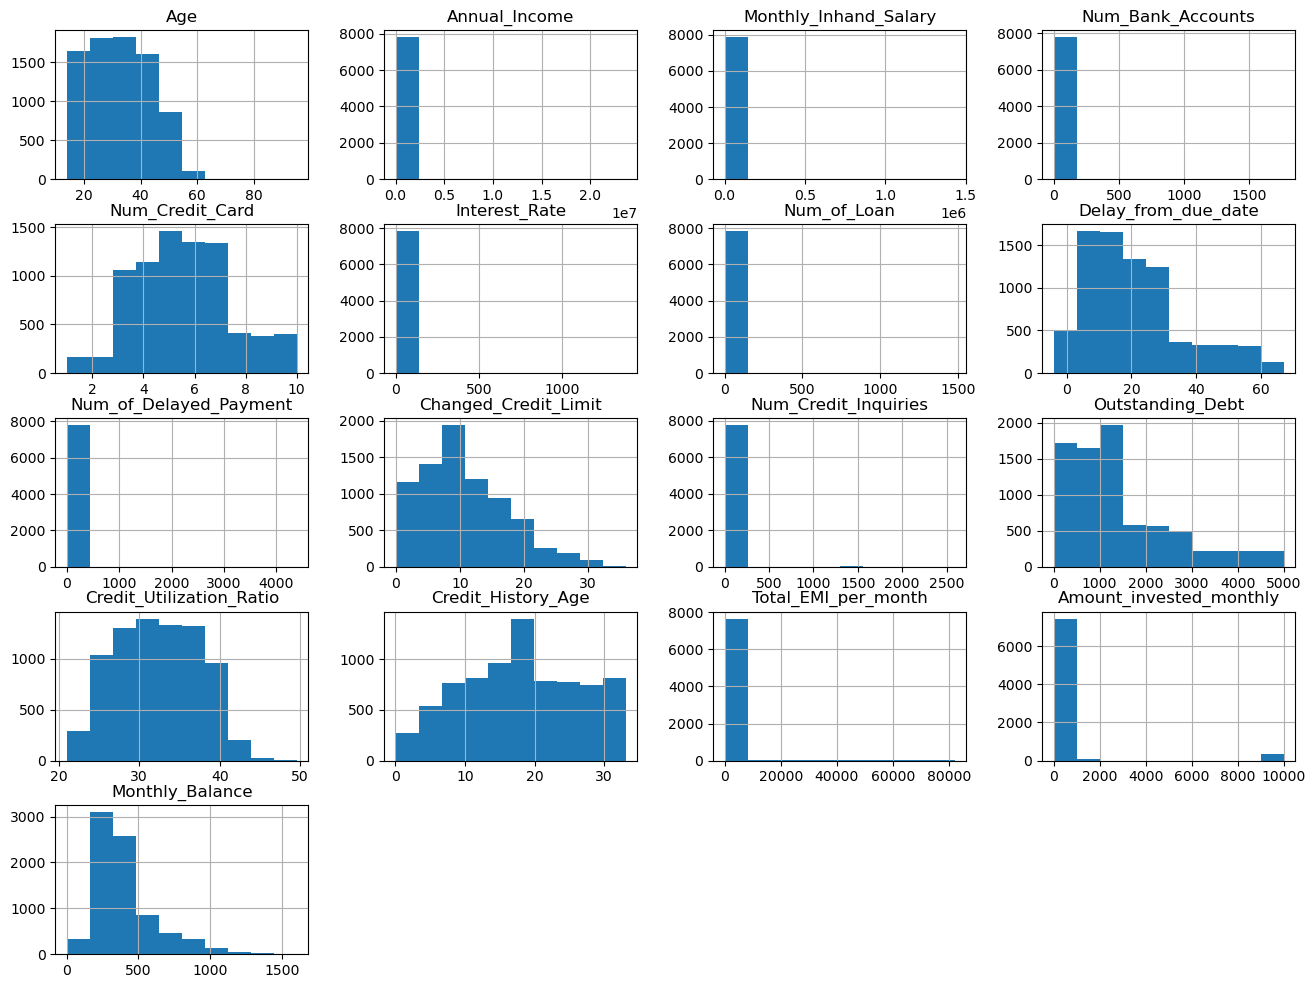

In [30]:
df.hist(figsize=(16, 12))

In [31]:
df.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

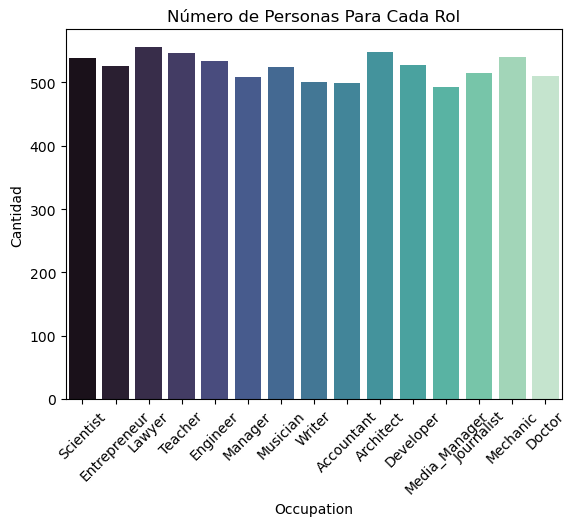

In [32]:
# Trazar el countplot de la columna 'Occupation'
sns.countplot(data=df, x='Occupation', palette='mako')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)


plt.title("Número de Personas Para Cada Rol")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

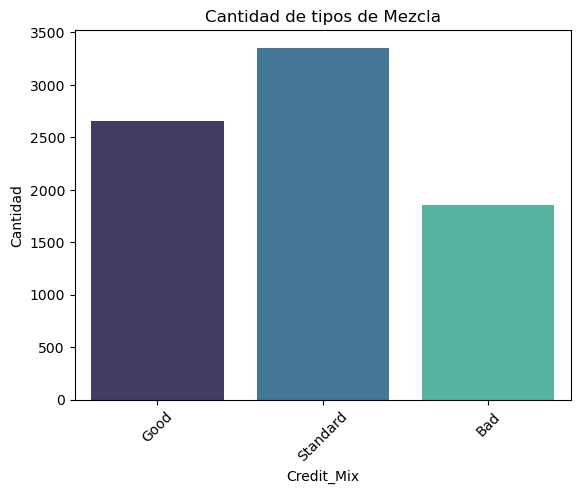

In [33]:
# Trazar el countplot de la columna 'Credit_Mix'
sns.countplot(data=df, x='Credit_Mix',palette="mako");

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)
plt.title("Cantidad de tipos de Mezcla")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

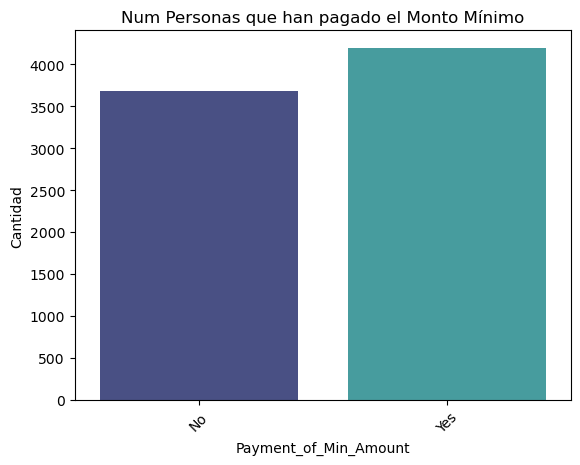

In [34]:
# Trazar el countplot de la columna 'Payment_of_Min_Amount'

sns.countplot(data=df, x='Payment_of_Min_Amount',palette="mako");

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)
plt.title("Num Personas que han pagado el Monto Mínimo")
plt.ylabel("Cantidad")
# Mostrar el gráfico
plt.show()

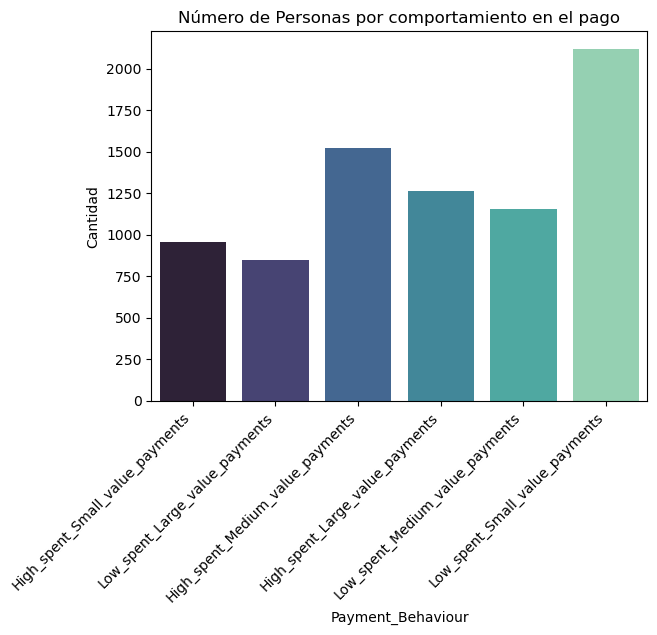

In [35]:
# Trazar el countplot de la columna 'Payment_of_Min_Amount'
sns.countplot(data=df, x='Payment_Behaviour',palette="mako");

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right')
plt.title("Número de Personas por comportamiento en el pago")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

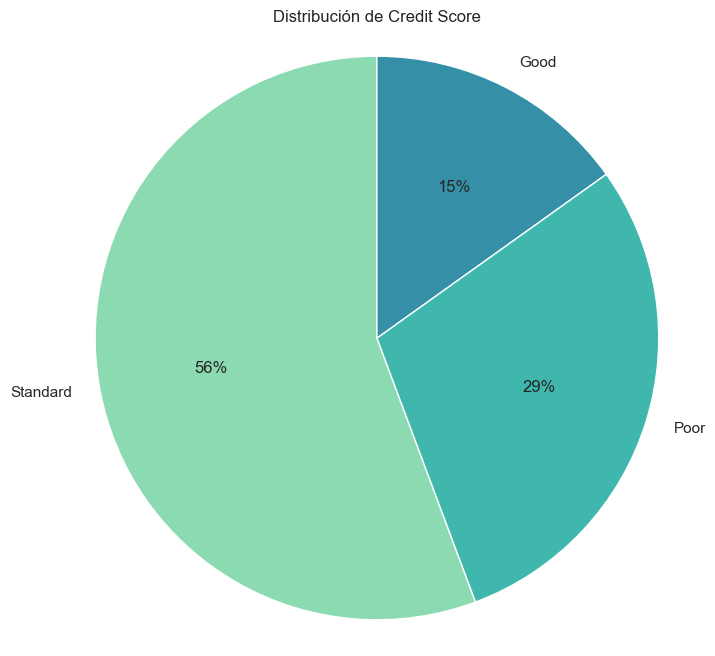

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los conteos de las categorías
counts = df['Credit_Score'].value_counts()
labels = counts.index

# Configurar la paleta de colores
colors = sns.color_palette('mako_r')

# Configurar el estilo del gráfico
sns.set(style='darkgrid')
plt.figure(figsize=(8, 8))

# Graficar el gráfico de pastel
plt.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Configurar el título y los ejes
plt.title('Distribución de Credit Score')
plt.axis('equal')

# Mostrar el gráfico
plt.show()

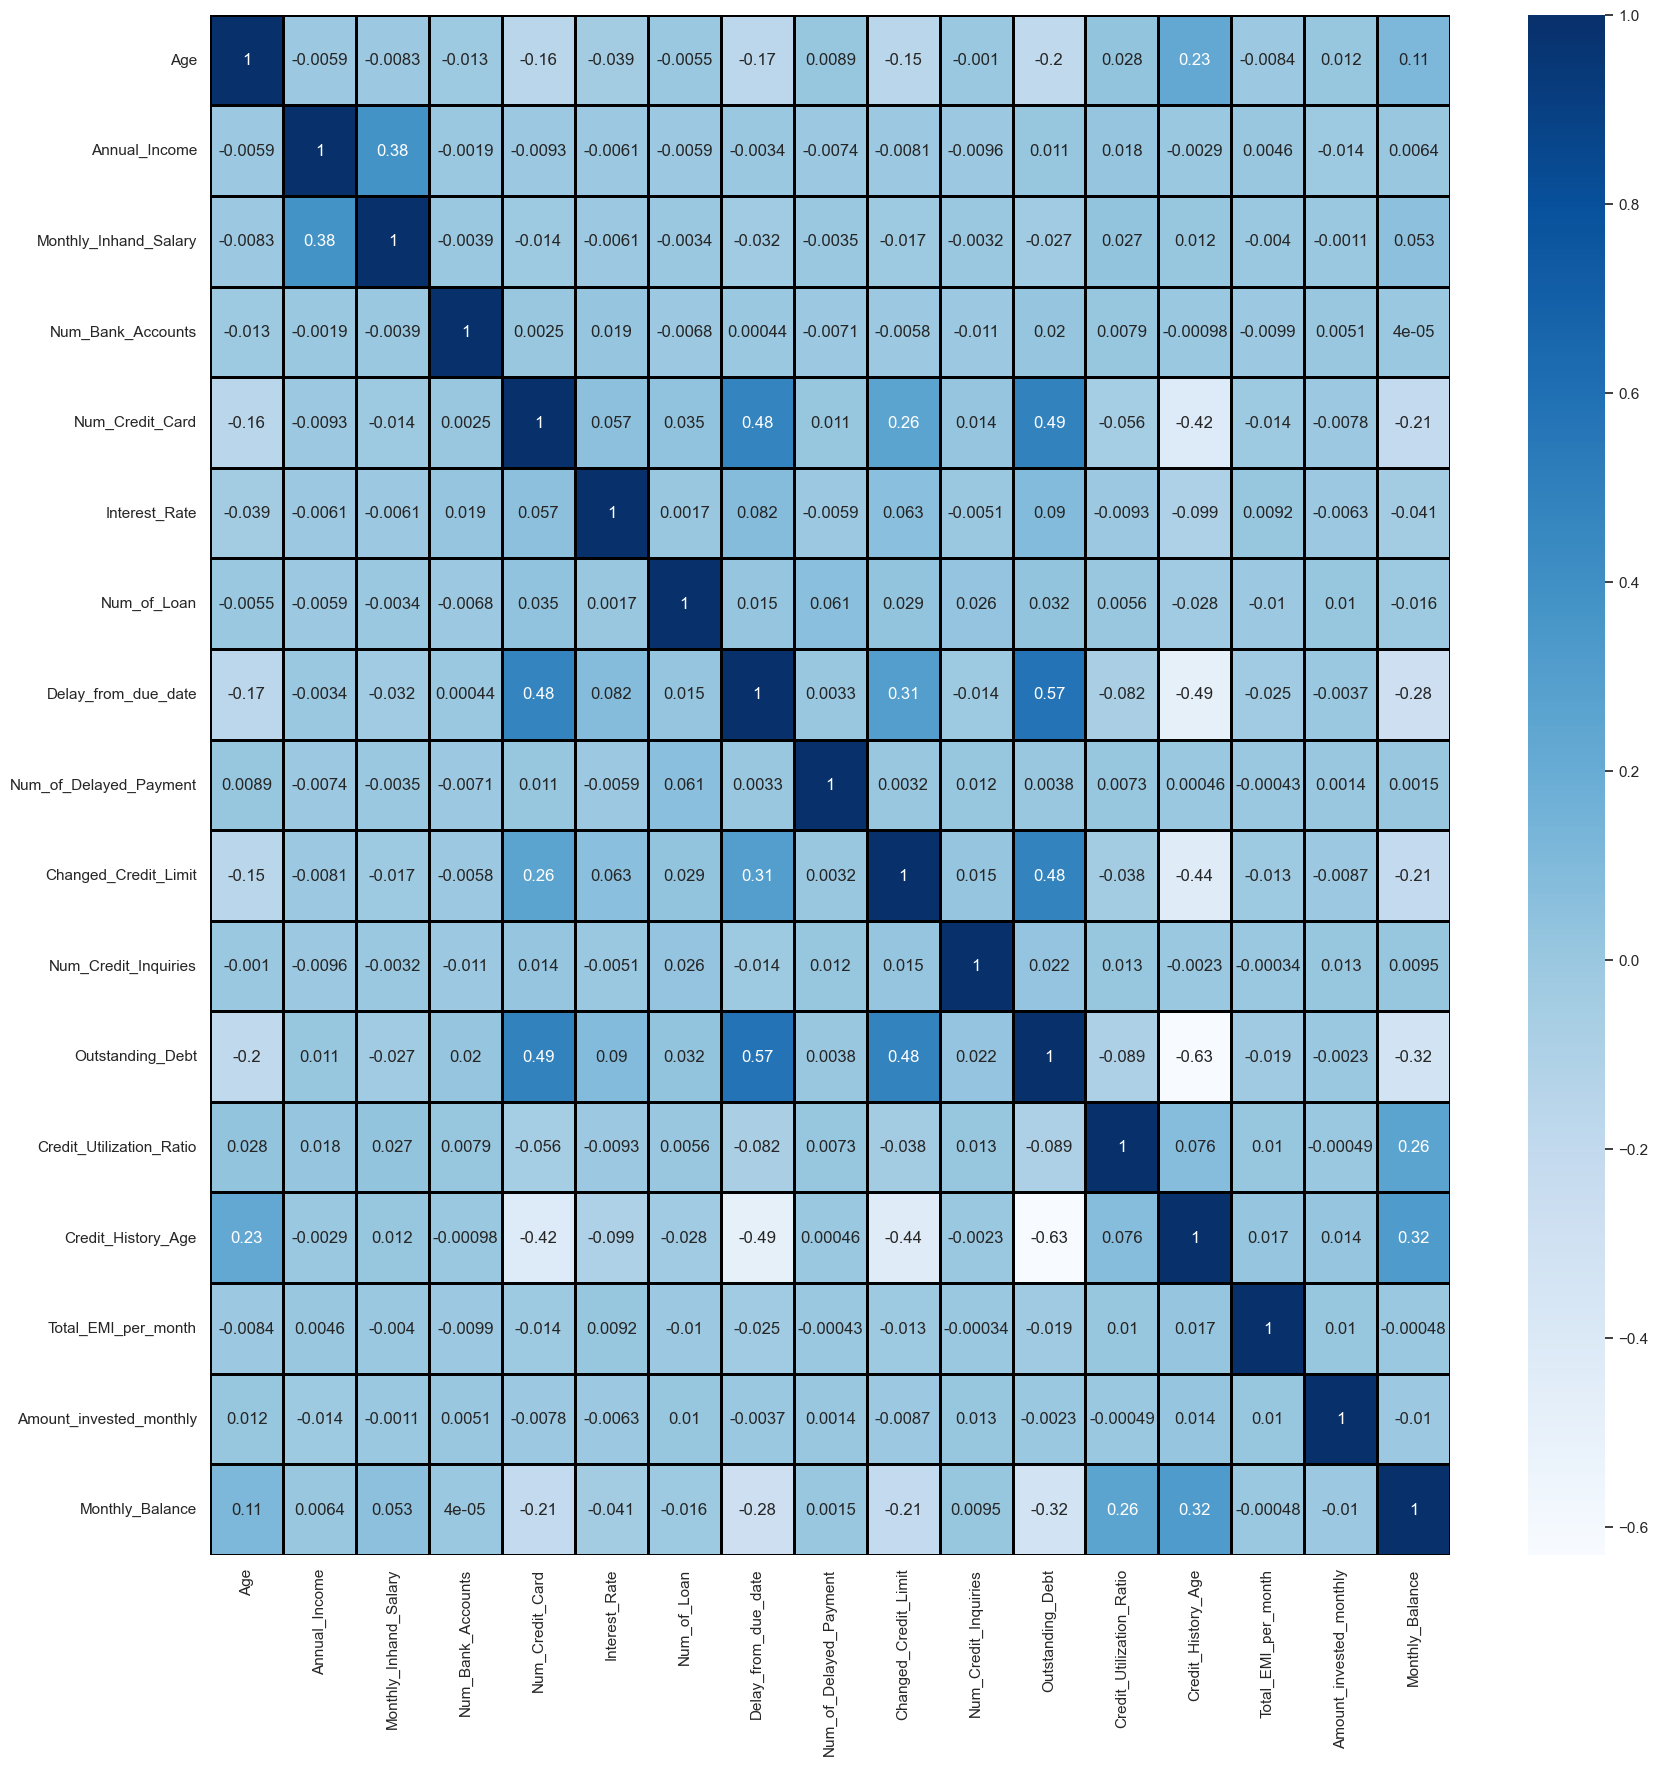

In [37]:
# Trazar un heatmat con la matriz de correlación

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linecolor='black',linewidth=1)

# Mostrar el gráfico

plt.show()

## Normalización de los datos

In [38]:
# Agrupamos profesiones para tener menos columnas cuando apliquemos onehot

df['Occupation'] = df['Occupation'].apply(lambda x: 'STEM' if x in ['Scientist', 'Engineer', 'Accountant', 'Architect', 'Developer'] else 
                                                'Directivos' if x in ['Entrepreneur', 'Manager', 'Media_Manager'] else 
                                                'Artistas' if x in ['Musician', 'Writer', 'Journalist'] else 'Públicos')

df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,STEM,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
24,54.0,Directivos,30689.89,2612.490833,2,5,4,1.0,0,6.0,1.99,4.0,Good,632.46,26.544229,17.250000,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,33.0,Públicos,131313.40,11242.783333,0,1,8,2.0,0,3.0,9.34,2.0,Good,352.16,32.200509,30.583333,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
80,40.0,Públicos,33751.27,2948.605833,5,5,20,3.0,16,20.0,11.00,4.0,Standard,1328.93,37.089076,19.166667,No,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard
88,32.0,STEM,88640.24,7266.686667,3,6,1,2.0,-1,0.0,3.51,3.0,Good,950.36,28.210617,25.416667,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard


In [39]:
# Dividimos variables categóricas y continuas

variables_categoricas = df.select_dtypes(include=['object'])
variables_continuas = df.select_dtypes(include=['int','float'])
variables_categoricas

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,STEM,Good,No,High_spent_Small_value_payments,Good
24,Directivos,Good,No,Low_spent_Large_value_payments,Standard
48,Públicos,Good,No,High_spent_Medium_value_payments,Good
80,Públicos,Standard,No,High_spent_Medium_value_payments,Standard
88,STEM,Good,No,High_spent_Large_value_payments,Standard
...,...,...,...,...,...
99936,STEM,Standard,No,High_spent_Medium_value_payments,Standard
99952,STEM,Good,No,High_spent_Small_value_payments,Poor
99960,Públicos,Good,No,High_spent_Small_value_payments,Good
99976,Artistas,Good,No,Low_spent_Small_value_payments,Good


In [40]:
# Obtener las columnas categóricas sin incluir "Credit_score"

columns_to_encode = [col for col in variables_categoricas.columns if col != "Credit_Score"]

# Aplicamos OneHotEcoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(variables_categoricas[columns_to_encode])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data)
encoded_df.columns = encoder.get_feature_names_out(columns_to_encode)

#### StandardScaler

In [41]:
# Creamos una instancia de StandardScaler

scaler = StandardScaler()

# Ajustamos y transformamos los datos del DataFrame

scaled_data = scaler.fit_transform(variables_continuas)

# Convertimos el resultado en un nuevo DataFrame

scaled_df = pd.DataFrame(scaled_data, columns=variables_continuas.columns)

In [42]:
# Unimos las dos tablas

encoded_scaled_df = pd.concat([encoded_df, scaled_df], axis=1)

# Imprimir el DataFrame codificado y escalado

print(encoded_scaled_df.columns.tolist())
print(encoded_scaled_df.shape)

['Occupation_Artistas', 'Occupation_Directivos', 'Occupation_Públicos', 'Occupation_STEM', 'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_High_spent_Large_value_payments', 'Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
(7867, 32)


#### Selección de Datos

In [43]:
X = encoded_scaled_df
y = df['Credit_Score']

#### SMOTE(Balanceo de datos)

In [44]:
# Realizamos SMOTE para ajustar el porcentaje de registros que tenemos por cada variable
# Como nuestros datos estan desequilibrados, necesitamos igualarlos realizando un submuestreo y sobremuestreo para las clases.

from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X, y = rus.fit_resample(X, y)


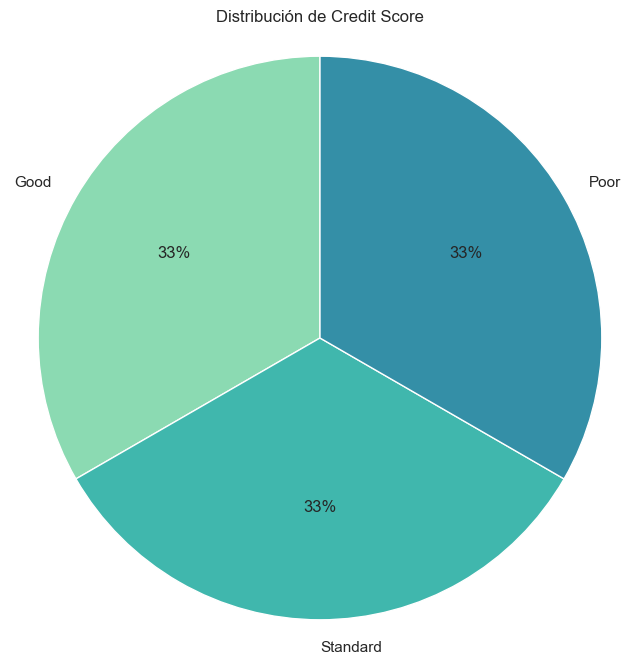

In [45]:
import matplotlib.pyplot as plt

# Obtener los conteos de las categorías
counts = y.value_counts()
labels = counts.index

# Configurar la paleta de colores
colors = sns.color_palette('mako_r')

# Configurar el estilo del gráfico
sns.set(style='darkgrid')
plt.figure(figsize=(8, 8))

# Graficar el gráfico de pastel
plt.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Configurar el título y los ejes
plt.title('Distribución de Credit Score')
plt.axis('equal')

# Mostrar el gráfico
plt.show()

In [46]:
# Conjunto de datos balanceado, contamos registros.
y.value_counts(normalize=True)
y.shape

(13143,)

# KNN

### División de datos (conjuntos de entrenamiento y de prueba)

In [47]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Busqueda de mejores hiperparametros con GridSearch

### Validación Cruzada

In [48]:
# Creamos el KNN vacío con la ariable K que queramos
k= 1
knn_model = KNeighborsClassifier(n_neighbors=k) 

# Aplicamos la validación cruzada con 5 particiones(tiene que estar entre 5 y 10 particiones como máximo)
scores = cross_val_score(knn_model, X, y, cv=5)

# Realizamos la media de todos los resultados
avg_score = np.mean(scores)

print(scores)
print(avg_score)

# Todos rondan el 0.85, es un conjunto estable

[0.85203499 0.84747052 0.86154431 0.88812785 0.89269406]
0.868374349328095


### Creación del Modelo KNN

In [49]:
KNNmodel = KNeighborsClassifier(n_neighbors=1)
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicción del conjunto de datos

In [50]:
y_pred = KNNmodel.predict(X_test)

### Validación de resultados

In [51]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
6170,Standard,Standard
8108,Good,Good
2447,Standard,Standard
3132,Standard,Good
6778,Standard,Standard


### Matriz de confusión

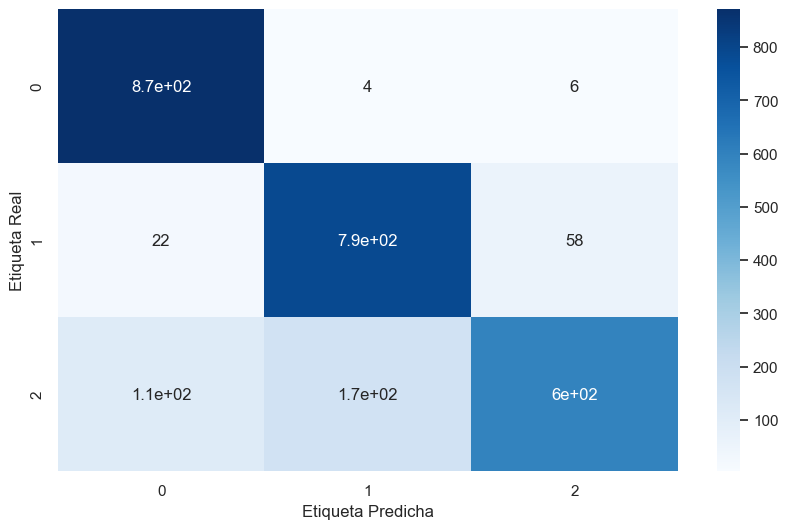

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Evaluación del Modelo

In [53]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[871,   4,   6],
       [ 22, 788,  58],
       [113, 172, 595]], dtype=int64)

### Métricas

In [54]:
KNNreport = classification_report(y_test, y_pred)

print(KNNreport)

              precision    recall  f1-score   support

        Good       0.87      0.99      0.92       881
        Poor       0.82      0.91      0.86       868
    Standard       0.90      0.68      0.77       880

    accuracy                           0.86      2629
   macro avg       0.86      0.86      0.85      2629
weighted avg       0.86      0.86      0.85      2629



In [55]:
# Precisión media del modelo
KNNscores = cross_val_score(KNNmodel, X, y, cv=5)
KNNavg_score = np.mean(KNNscores)
print(KNNscores)
print('Precisión media:',KNNavg_score)

[0.85203499 0.84747052 0.86154431 0.88812785 0.89269406]
Precisión media: 0.868374349328095


# Decision Tree Classifier

### Busqueda de mejores hiperparametros con GridSearch

### Creación del Modelo DecisionTree

In [56]:
DTmodel = DecisionTreeClassifier(criterion = 'gini', max_depth=10, max_features='log2' )

DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2')

### Predicción del conjunto de datos

In [57]:
y_pred = DTmodel.predict(X_test)

### Validación de resultados

In [58]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
6170,Standard,Standard
8108,Good,Good
2447,Standard,Standard
3132,Standard,Good
6778,Standard,Standard


### Matriz de confusión

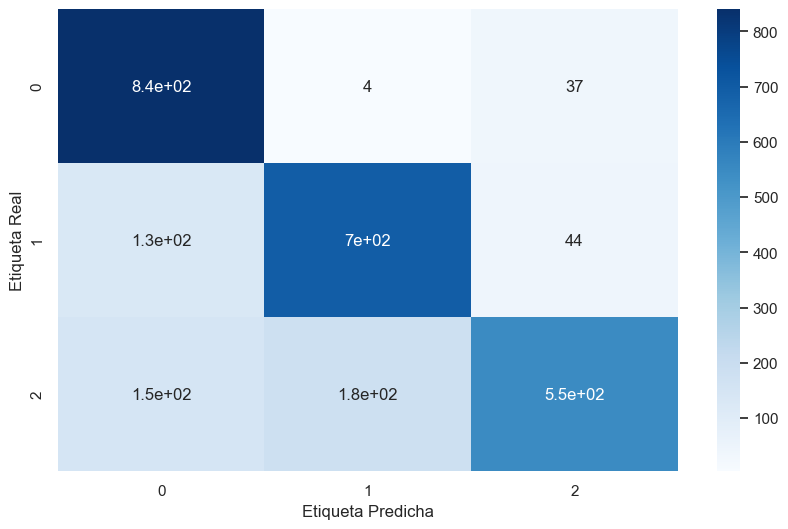

In [59]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Evaluación del Modelo

In [60]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[840,   4,  37],
       [129, 695,  44],
       [149, 183, 548]], dtype=int64)

### Métricas

In [61]:
DTreport = classification_report(y_test, y_pred)
print(DTreport)

              precision    recall  f1-score   support

        Good       0.75      0.95      0.84       881
        Poor       0.79      0.80      0.79       868
    Standard       0.87      0.62      0.73       880

    accuracy                           0.79      2629
   macro avg       0.80      0.79      0.79      2629
weighted avg       0.80      0.79      0.79      2629



In [62]:
# Precisión media del modelo
DTscores = cross_val_score(DTmodel, X, y, cv=5)
DTavg_score = np.mean(DTscores)
print(DTscores)
print('Precisión media:',DTavg_score) 

[0.74248764 0.77976417 0.81133511 0.83447489 0.83675799]
Precisión media: 0.8009639583778405


# ExtraTree

### Importación de librerías

In [63]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

### División de datos (conjuntos de entrenamiento y de prueba)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Busqueda de mejores hiperparametros con GridSearch

### Creación del Modelo Extratree 

In [65]:
ETmodel = ExtraTreesClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
ETmodel.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=300)

In [66]:
# Calcular la puntuación de precisión en los datos de prueba

score = ETmodel.score(X_test, y_test)

# Imprimir la puntuación de precisión

print("Model Score:", score)


Model Score: 0.8508938759984785


### Predicción del conjunto de datos

In [67]:
y_pred = ETmodel.predict(X_test)

### Validación de resultados

In [68]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
6170,Standard,Standard
8108,Good,Good
2447,Standard,Standard
3132,Standard,Good
6778,Standard,Standard


### Matriz de confusión

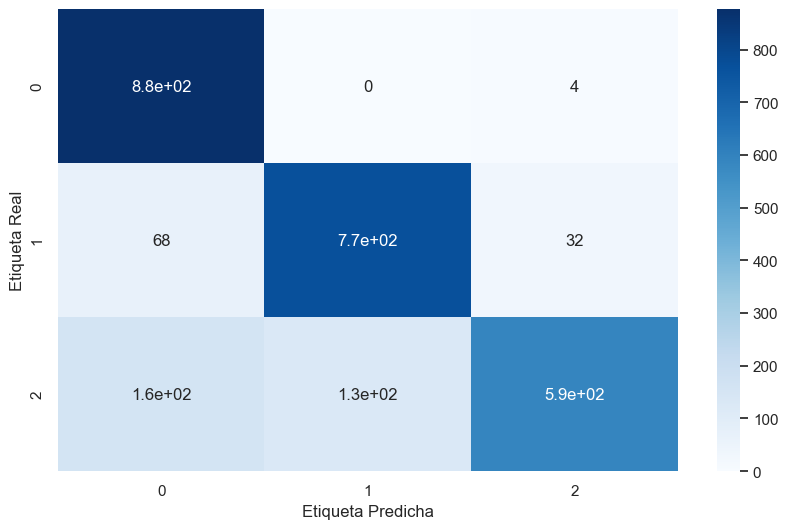

In [69]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Evaluación del Modelo

In [70]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[877,   0,   4],
       [ 68, 768,  32],
       [159, 129, 592]], dtype=int64)

### Métricas

In [71]:
ETreport = classification_report(y_test, y_pred)
print(ETreport)

              precision    recall  f1-score   support

        Good       0.79      1.00      0.88       881
        Poor       0.86      0.88      0.87       868
    Standard       0.94      0.67      0.79       880

    accuracy                           0.85      2629
   macro avg       0.86      0.85      0.85      2629
weighted avg       0.86      0.85      0.85      2629



In [72]:
# Precisión media del modelo
ETscores = cross_val_score(ETmodel, X, y, cv=5)
ETavg_score = np.mean(ETscores)
print(ETscores)
print('Precisión media:',ETavg_score)

[0.84290605 0.84556866 0.85393686 0.86986301 0.87975647]
Precisión media: 0.858406209165652


# Random Forest

### Importación de librerías

In [73]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### División de datos (conjuntos de entrenamiento y de prueba)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Busqueda de mejores hiperparametros con GridSearch

### Creación del Random Forest

In [75]:
RFmodel = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1,
                                 min_samples_split=2, n_estimators=100)
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
# Calcular la puntuación de precisión en los datos de prueba

score = RFmodel.score(X_test, y_test)

# Imprimir la puntuación de precisión

print("Model Score:", score)

Model Score: 0.8474705211106884


### Predicción del conjunto de datos

In [77]:
y_pred = KNNmodel.predict(X_test)

### Validación de resultados

In [78]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
6170,Standard,Standard
8108,Good,Good
2447,Standard,Standard
3132,Standard,Good
6778,Standard,Standard


### Matriz de confusión

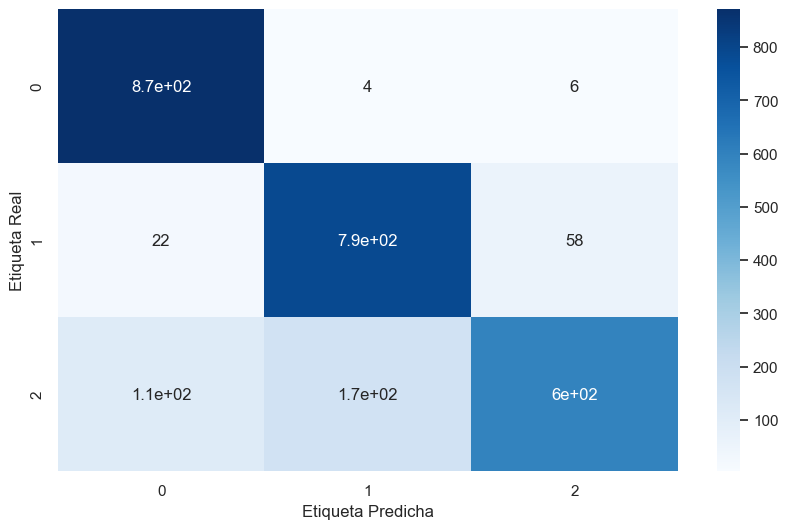

In [79]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Evaluación del Modelo

In [80]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[871,   4,   6],
       [ 22, 788,  58],
       [113, 172, 595]], dtype=int64)

### Métricas

In [81]:
RFreport = classification_report(y_test, y_pred)
print(RFreport)

              precision    recall  f1-score   support

        Good       0.87      0.99      0.92       881
        Poor       0.82      0.91      0.86       868
    Standard       0.90      0.68      0.77       880

    accuracy                           0.86      2629
   macro avg       0.86      0.86      0.85      2629
weighted avg       0.86      0.86      0.85      2629



In [82]:
# Precisión media del modelo
RFscores = cross_val_score(RFmodel, X, y, cv=5)
RFavg_score = np.mean(RFscores)
print(RFscores)
print('Precisión media:',RFavg_score)

[0.80981362 0.84670978 0.8604032  0.85350076 0.87366819]
Precisión media: 0.8488191075655969


# XGBClassifier

### Importación de librerías

In [83]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### División de datos (conjuntos de entrenamiento y de prueba)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Convertir las etiquetas de clase a valores numéricos

In [85]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### Busqueda de mejores hiperparametros con GridSearch

## Creación del Modelo XGBClassifier

In [86]:
XGBmodel = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [87]:
# Calcular la puntuación de precisión en los datos de prueba

score = XGBmodel.score(X_test, y_test)

# Imprimir la puntuación de precisión

print("Model Score:", score)

Model Score: 0.8508938759984785


### Predicción del conjunto de datos

In [88]:
y_pred = XGBmodel.predict(X_test)

### Validación de resultados

In [89]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2


### Matriz de confusión

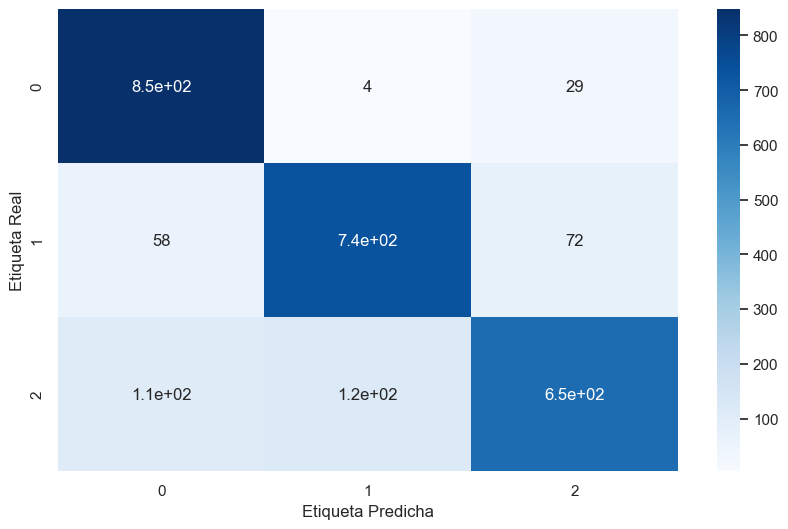

In [90]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Evaluación del Modelo

In [91]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[848,   4,  29],
       [ 58, 738,  72],
       [107, 122, 651]], dtype=int64)

### Métricas

In [92]:
XGBreport = classification_report(y_test, y_pred)
print(XGBreport)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       881
           1       0.85      0.85      0.85       868
           2       0.87      0.74      0.80       880

    accuracy                           0.85      2629
   macro avg       0.85      0.85      0.85      2629
weighted avg       0.85      0.85      0.85      2629



In [93]:
# Volver a codificar etiquetas

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Realizar la validación cruzada con el modelo

XGBscores = cross_val_score(XGBmodel, X, y_encoded, cv=5)
XGBavg_score = np.mean(XGBscores)

print(XGBscores)
print('Precisión media:', XGBavg_score)

[0.71890453 0.83301636 0.86116394 0.87404871 0.88926941]
Precisión media: 0.8352805871519691


# Curvas ROC

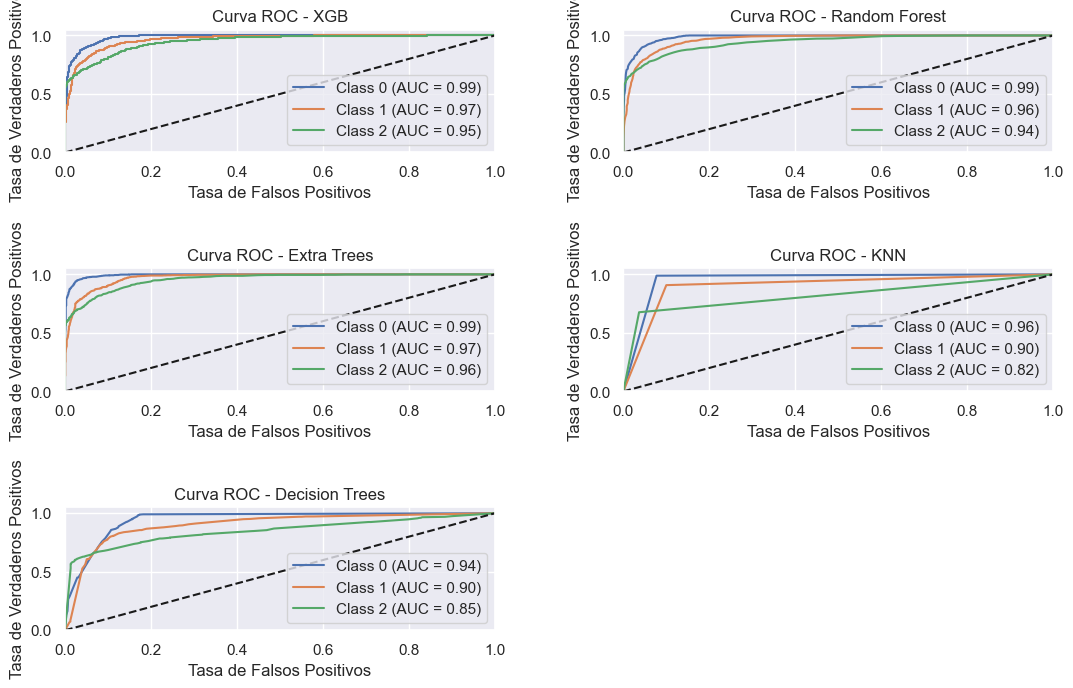

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Lista de modelos y sus respectivos nombres
models = [XGBmodel, RFmodel, ETmodel, KNNmodel, DTmodel]
model_names = ['XGB', 'Random Forest', 'Extra Trees', 'KNN', 'Decision Trees']

# Convertir las etiquetas verdaderas a un formato binario
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Configurar el layout de los subplots
num_models = len(models)
num_rows = (num_models + 1) // 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Generar las curvas ROC para cada modelo y agregarlas a los subplots
for i, (model, model_name) in enumerate(zip(models, model_names)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Obtener las probabilidades de predicción para cada clase
    y_pred_prob = model.predict_proba(X_test)

    # Calcular las curvas ROC y el área bajo la curva (AUC) para cada clase
    classes = np.unique(y_test)
    for j in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, j], y_pred_prob[:, j])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(classes[j], roc_auc))

    # Configurar los ejes y la leyenda para cada subplot
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title('Curva ROC - {}'.format(model_name))
    ax.legend(loc='lower right')
    

# Ajustar la apariencia visual de los subplots
for ax in axes.flat[num_models:]:
    ax.axis('off')


# Mostrar los subplots
plt.show()


Se representa gráficamente la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de clasificación del modelo.

En la gráfica, el eje x representa la tasa de falsos positivos (FPR), que es la proporción de instancias negativas incorrectamente clasificadas como positivas. El eje y representa la tasa de verdaderos positivos (TPR), que es la proporción de instancias positivas correctamente clasificadas como positivas.

Idealmente, queremos que el modelo tenga una alta tasa de verdaderos positivos (TPR) y una baja tasa de falsos positivos (FPR). Por lo tanto, una curva ROC ideal se acercaría al vértice superior izquierdo del gráfico, donde el TPR es 1 y el FPR es 0.

El área bajo la curva (AUC) es una medida numérica del rendimiento del modelo. Cuanto mayor sea el valor del AUC, mejor será el rendimiento del modelo para distinguir entre las clases. Un valor de AUC de 1 indica un modelo perfecto, mientras que un valor de 0.5 indica un modelo que esencialmente se comporta al azar.
